# Regresión Lineal Iterativa
# Perceptrón

- Cargar librerías
- Cargar datos (reglin)
- Dividir en entrenamiento y prueba
    - visualizar
- Programar y probar
    - medir error
    - revisar las w's y probar otra vez
- Probar con reglin3 y revisar w's
- Probar con nuevos datos andSvm
    - visualizar
- Modificar función de transferencia
- Probar nuevamente
- Graficar frontera de decisión
- Generar datos para el XOR y visualizar


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from random import random, uniform
from sklearn.preprocessing import StandardScaler

In [108]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/regLin.csv")
X_train, X_test, y_train, y_test =train_test_split(df[['X']],df['y'],test_size=0.25)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [109]:
scalerX = StandardScaler()
scalerX.fit(X_train) #Calcula media y de
X_train=scalerX.transform(X_train) # lo aplica

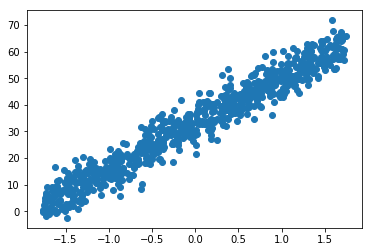

In [110]:
plt.scatter(X_train,y_train)

In [111]:
#Salida del modelo
def salida(X,w):
    #w0+sumatoria(xw)
    res=w[0]
    for i,x in enumerate(X):
        res=res+w[i+1]*x
    return res

In [112]:
def entrena(X_train,y_train,w,eta=0.01):
    for x,y in zip(X_train,y_train):
        error=y-salida(x,w)
        w[0]=w[0]+eta*error
        for peso in range(len(w[1:])): ##Se podia con el enumerate como arriba
            w[peso+1]=w[peso+1]+eta*error*x[peso]
    return w
        

In [113]:
w=[1,1]
for i in range(100):
    w=entrena(X_train,y_train,w)

In [114]:
y=[salida(x,w) for x in X_train]

In [115]:
np.mean((y_train-y)**2)

17.816530959440392

Con los datos de prueba

In [116]:
X_test=scalerX.transform(X_test)
y=[salida(x,w) for x in X_test]
np.mean((y_test-y)**2)

15.33740027627432

In [117]:
df = pd.read_csv("/Users/fesponda/Itam/Itam/Clases Itam/RiskMath/RiskDistrib/Datos/andSVM.csv")


In [118]:
X_train, X_test, y_train, y_test =train_test_split(df[['X1','X2']],df['y'],test_size=0.25)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [119]:
X_train[:,0]

array([0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 3, 1, 3, 3, 0, 3, 0, 0, 1, 1, 1, 3,
       3, 1, 0, 2, 0, 1, 1, 0, 0])

In [120]:
color=[]
for i in y_train:
    if i==0:
        color.append('b')
    else:
        color.append('r')

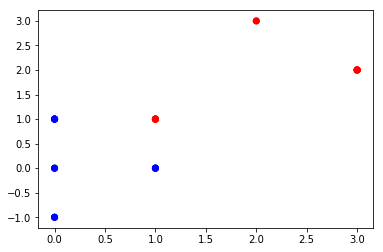

In [121]:
plt.scatter(X_train[:,0],X_train[:,1],c=color)

In [122]:
y_train

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0])

### Perceptron. Primer algoritmo de clasificacion

In [124]:
def salida(X,w):
    #w0+sumatoria(xw)
    res=w[0]
    for i,x in enumerate(X):
        res=res+w[i+1]*x
    if res >0:
        return 1
    else:
        return 0
    return res

In [150]:
w=[2,1,4]
for i in range(100):
    w=entrena(X_train,y_train,w)

In [151]:
w

[-1.6200000000000028, 0.1999999999999993, 1.6100000000000423]

In [152]:
x=[uniform(0,3) for i in range(100)]

In [153]:
m=-w[1]/w[2]
b=-w[0]/w[2]

In [154]:
y=[m*i+b for i in x ]

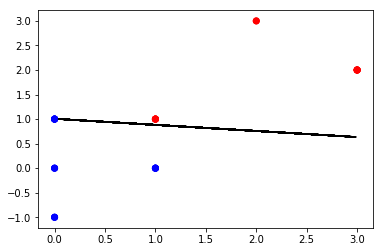

In [155]:
plt.scatter(X_train[:,0],X_train[:,1],c=color)
plt.plot(x,y,c='k')